<a href="https://colab.research.google.com/github/Samhitha-Medi/cs666student/blob/main/Copy_of_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

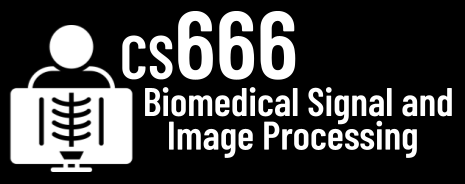
#Assignment 5

In [ ]:
# NAME: SAMHITHA MEDI
# ID- 02050466

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.5 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: 220 slices

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

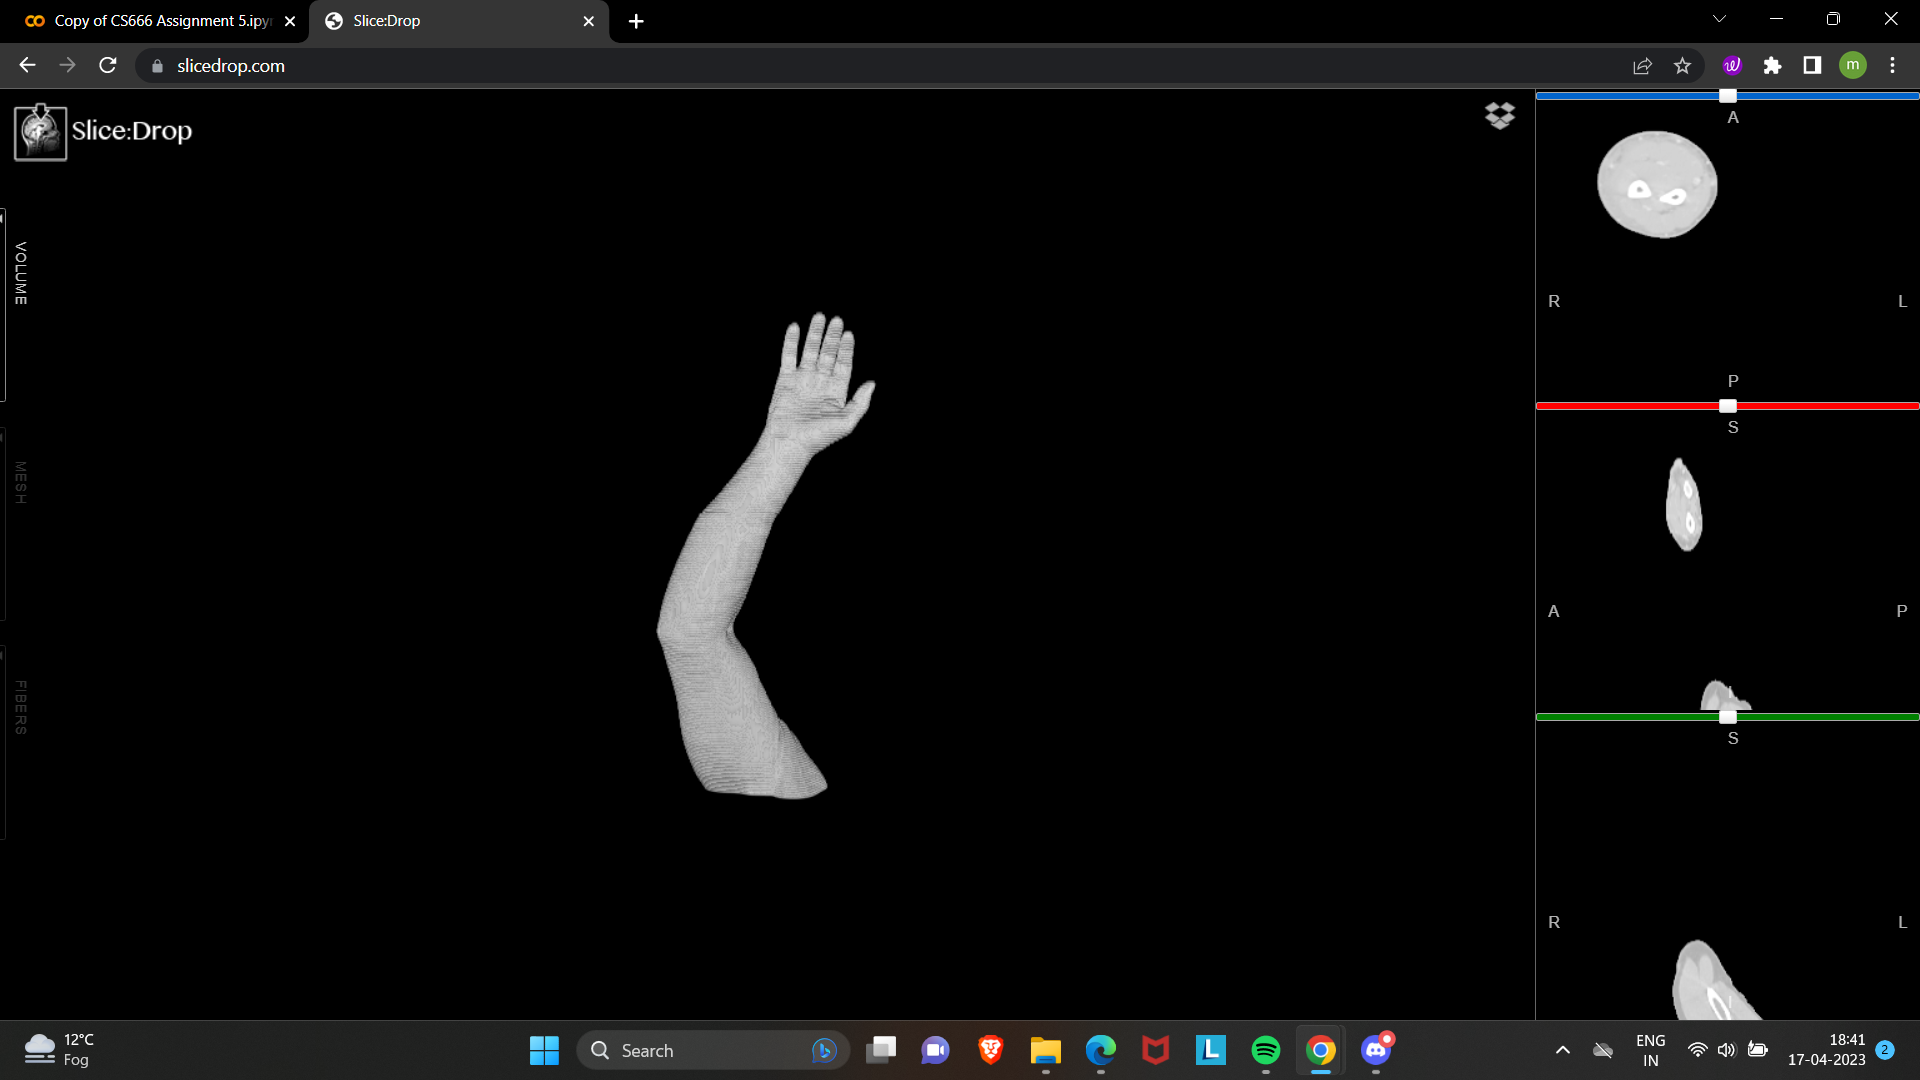

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

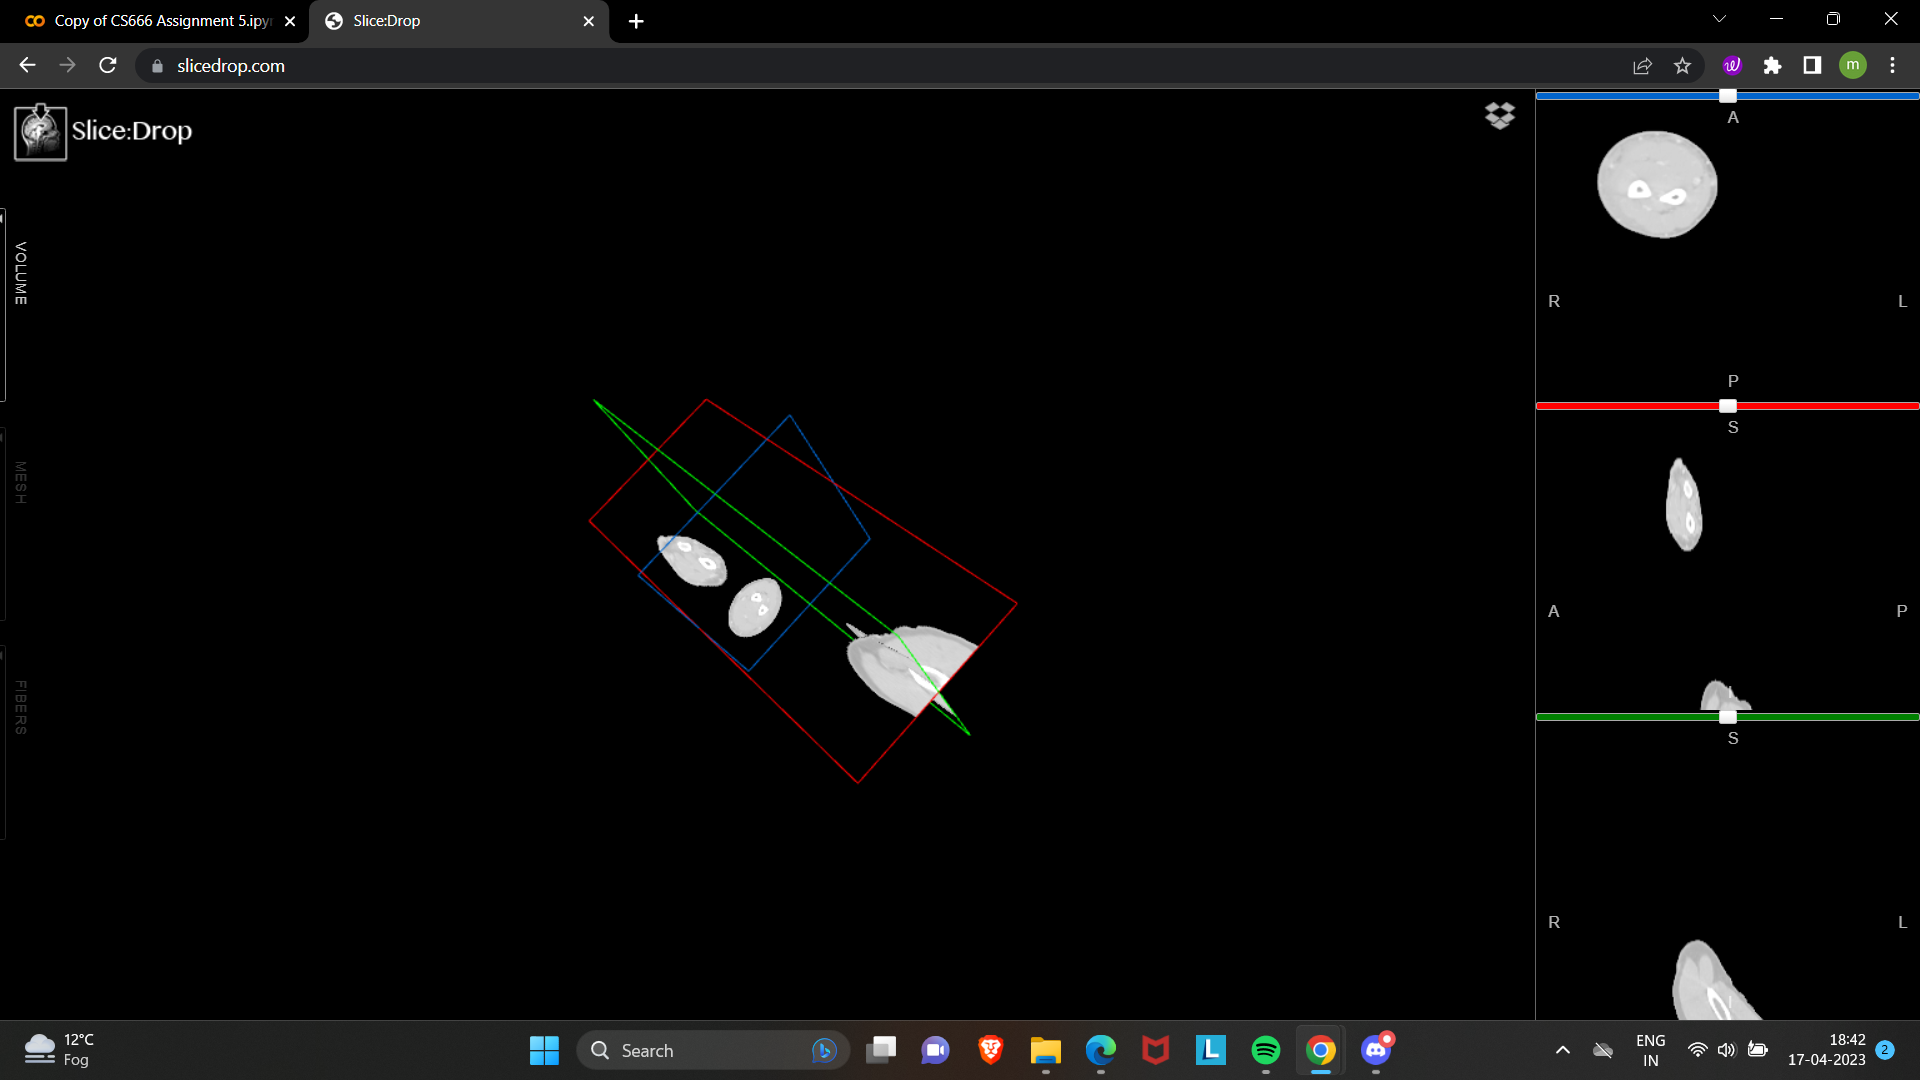

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

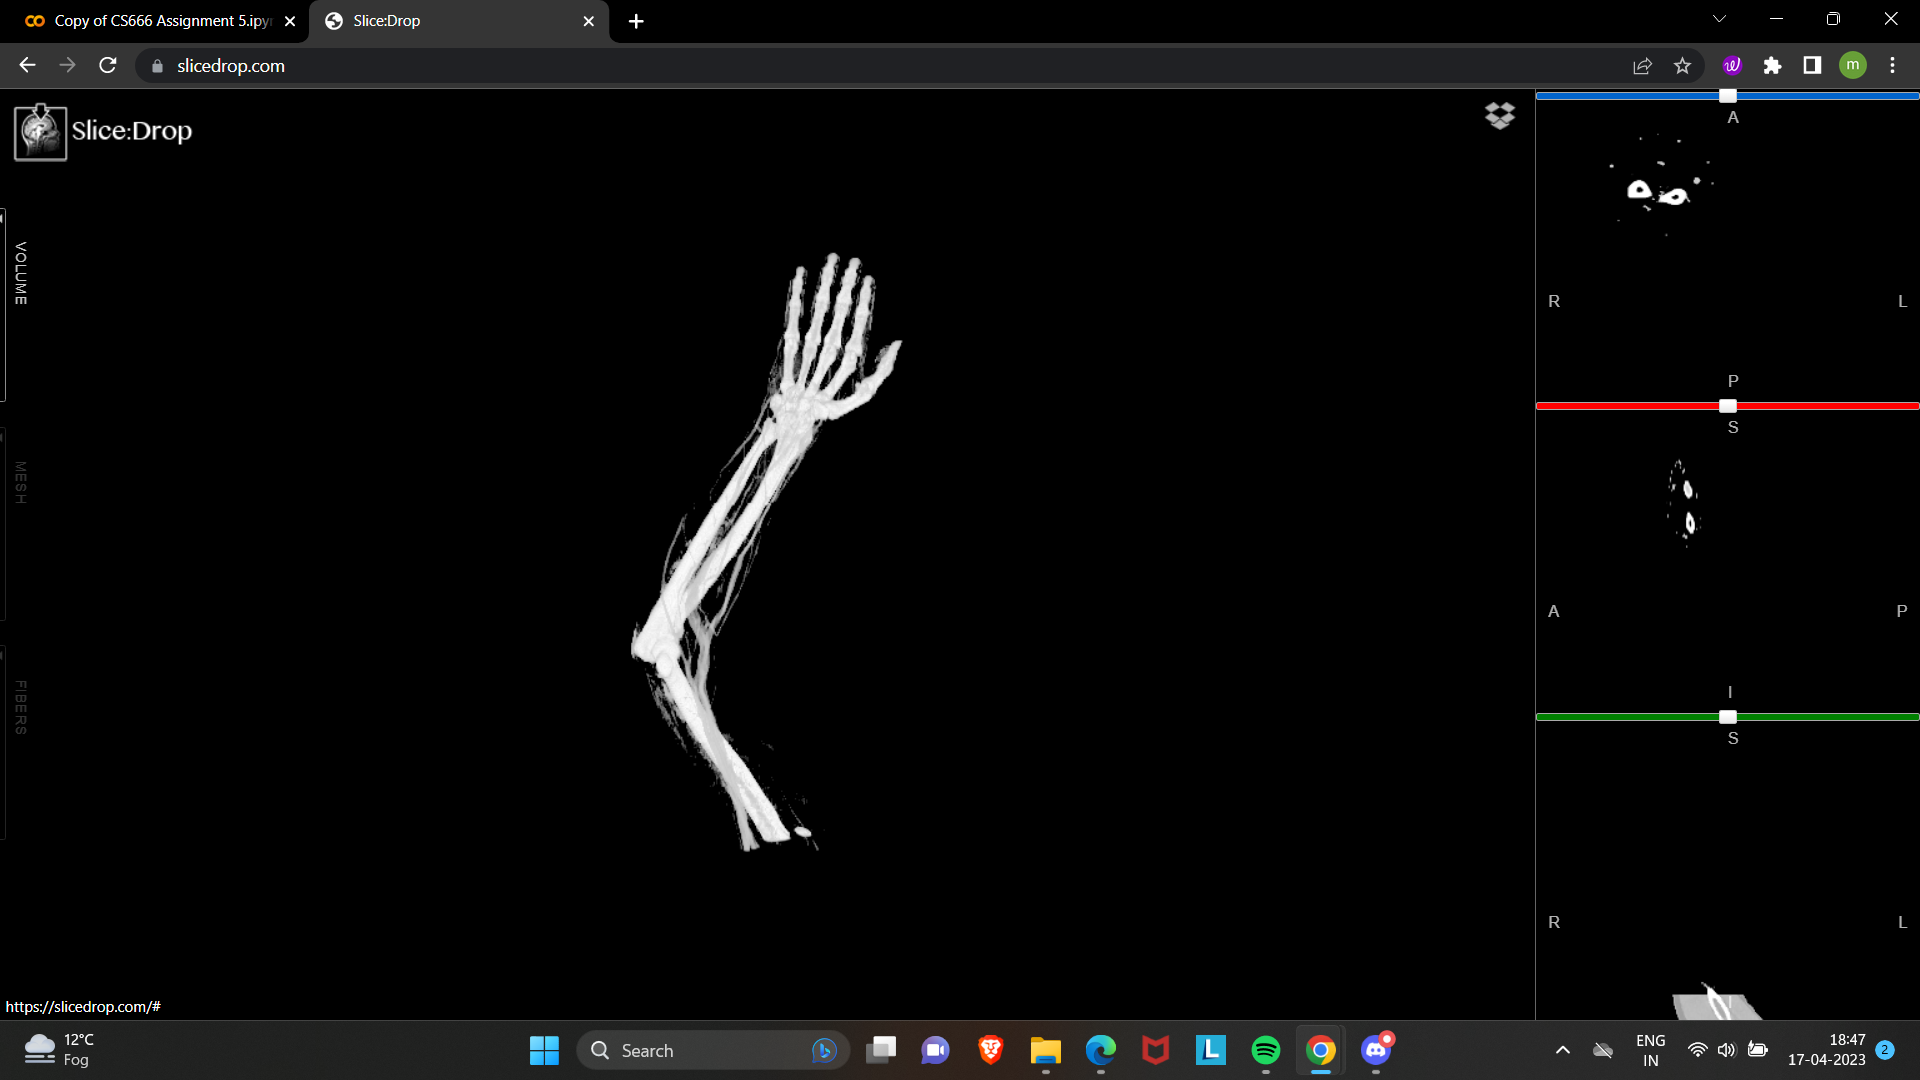

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [ ]:
from pydicom import dcmread
import os
import numpy as np

In [87]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

files=[]
file_names = os.listdir("ct")
file_names.sort()
for fname in file_names:
  files.append(dcmread("ct/"+fname))

# PathDicom = "./ct/"
# files = []  # create an empty list
# for dirName, subdirList, fileList in os.walk(PathDicom):
#     for filename in fileList:
#         if ".dcm" in filename.lower():  # check whether the file's DICOM
#             files.append(os.path.join(dirName,filename))

print("file count: {}".format(len(files)))
# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1
# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# creating a 3d volume from the slices
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

#img3d is the 3D volume made out of reading all slices
print(img3d.shape)
print(img3d)

file count: 220
(454, 512, 220)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

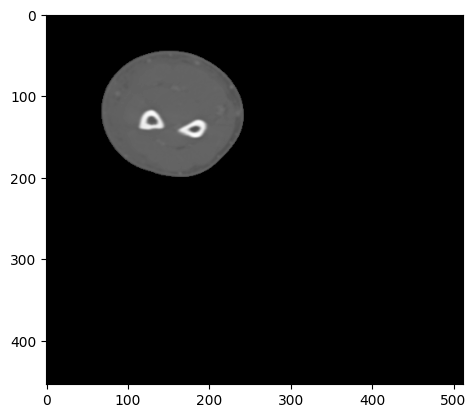

In [ ]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt
plt.imshow(img3d[:, :, img_shape[2]//2],cmap='gray')

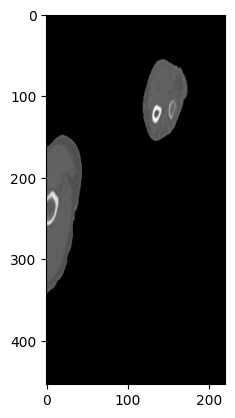

In [93]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(img3d[:, img_shape[1]//2, :],cmap='gray')

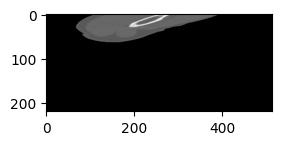

In [92]:
# TODO: YOUR CODE FOR CORONAL
a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T,cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [25]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

vmin:  -175.0
vmax:  235.0


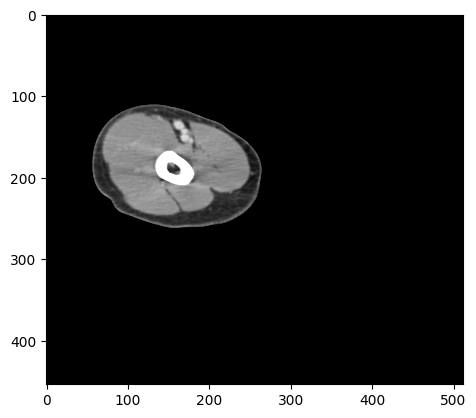

In [99]:
# TODO: YOUR CODE

level = files[0].WindowCenter
window = files[0].WindowWidth
rescale_intercept = slices[0].RescaleIntercept
#print(files[100].pixel_array)
vmin = level - window/2
vmax = level + window/2
print("vmin: ",vmin)
print("vmax: ",vmax)
plt.imshow(files[180].pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)

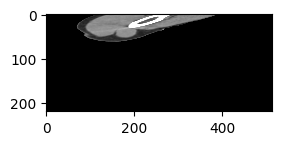

In [85]:
# 2) Play around with different Window/Level values that enhance
# the visualization.
plt.imshow(img3d[img_shape[0]//2, :, :].T + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)

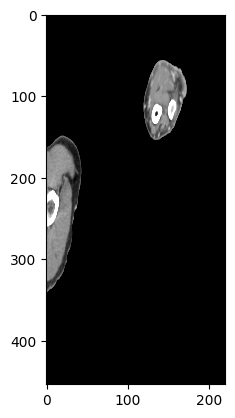

In [37]:
# TODO: YOUR CODE
plt.imshow( img3d[:, img_shape[1]//2, :]+ rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)

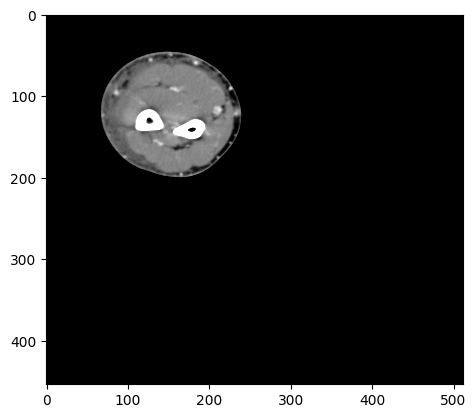

In [104]:
level=50
window=300
vmin = level - window/2
vmax = level + window/2
plt.imshow(files[110].pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)

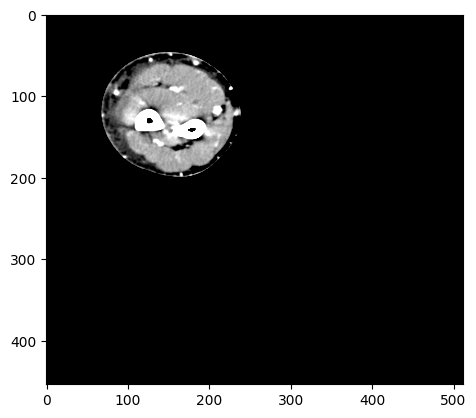

In [103]:
level=40
window=100
vmin = level - window/2
vmax = level + window/2
plt.imshow(files[110].pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)

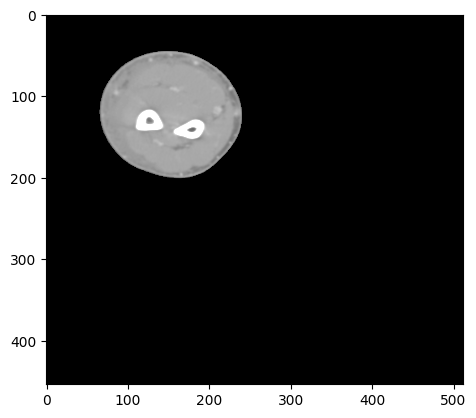

In [102]:
level=-100
window=1000
vmin = level - window/2
vmax = level + window/2
plt.imshow(files[110].pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)

In [ ]:
# Which values make sense and why?

After changing the values, I could just see that the bone image is changing with the change in the value. Changing the range gives a better picture of different parts.



 

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

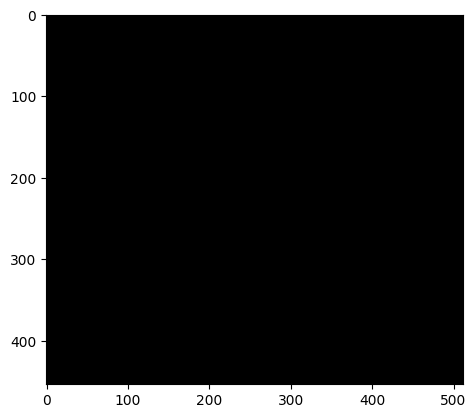

In [119]:
# TODO: YOUR CODE TO SEGMENT FAT
# values= -1000 to -60
f_mask=img3d.copy().astype(np.int16)
f_mask[(f_mask  < -100)] = 0
f_mask[f_mask > -60] = 0
plt.imshow(f_mask[:, :, 200], cmap='gray')

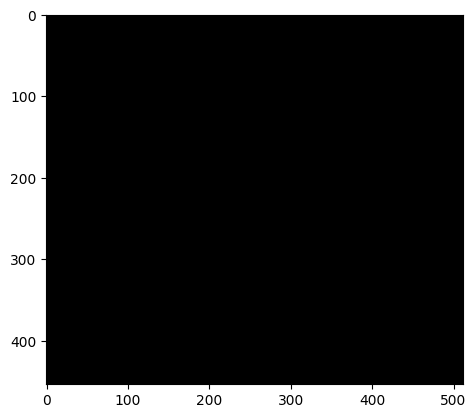

In [117]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
# values= 80 to 40
t_mask=img3d.copy().astype(np.int16)
t_mask[(t_mask  > 80)] = 0
t_mask[t_mask < 40] = 0
plt.imshow(t_mask[:, :, 160], cmap='gray')

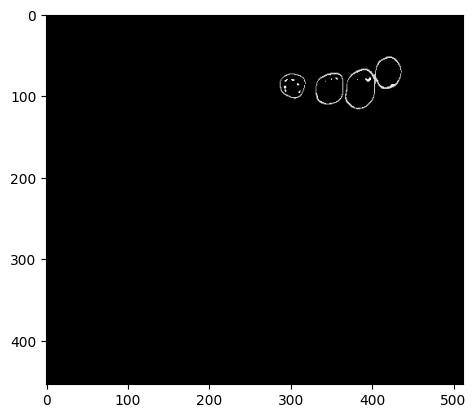

In [114]:
# TODO: YOUR CODE TO SEGMENT BONES
# values= 1000 to 40
b_mask=img3d.copy().astype(np.int16)
b_mask[(b_mask  >1000)] = 0
b_mask[b_mask < 400] = 0
plt.imshow(b_mask[:, :, 200], cmap='gray')

In [ ]:
# Are the segmentations good?

I tried doing the segmentation, and I feel the segementations are not good enough to show the different components.

In [ ]:
#collaboration with nishika divya lewis

#Reference links-

#https://pydicom.github.io/pydicom/stable/auto_examples/image_processing/reslice.html#sphx-glr-auto-examples-image-processing-reslice-py
#https://www.raddq.com/dicom-processing-segmentation-visualization-in-python/

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""